In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\User\\Desktop\\Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [30]:
target=df.loc[:,'LeaveOrNot']
target

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
le_jy = LabelEncoder()
le_city = LabelEncoder()
le_gender=LabelEncoder()
le_eb=LabelEncoder()

In [38]:
inputs = df.drop('LeaveOrNot',axis='columns')
inputs['Education'] = le_education.fit_transform(inputs['Education'])
inputs['JoiningYear'] = le_jy.fit_transform(inputs['JoiningYear'])
inputs['City'] = le_city.fit_transform(inputs['City'])
inputs['Gender'] = le_gender.fit_transform(inputs['Gender'])
inputs['EverBenched'] = le_eb.fit_transform(inputs['EverBenched'])


In [39]:
inputs

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,5,0,3,34,1,0,0
1,0,1,2,1,28,0,0,3
2,0,2,1,3,38,0,0,2
3,1,4,0,3,27,1,0,5
4,1,5,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,1,0,3,26,0,0,4
4649,1,1,2,2,37,1,0,2
4650,1,6,1,3,27,1,0,5
4651,0,0,0,3,30,1,1,2


In [12]:
#inputs_n = inputs.drop(['Education','JoiningYear','City','Gender','EverBenched'],axis='columns')

In [10]:
#inputs_n

,PaymentTier,Age,ExperienceInCurrentDomain
0,3,34,0
1,1,28,3
2,3,38,2
3,3,27,5
4,3,24,2
...,...,...,...
4648,3,26,4
4649,2,37,2
4650,3,27,5
4651,3,30,2


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)


In [42]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
inputs.dtypes

Education                    int32
JoiningYear                  int64
City                         int32
PaymentTier                  int64
Age                          int64
Gender                       int32
EverBenched                  int32
ExperienceInCurrentDomain    int64
dtype: object

In [25]:
X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4333,0,5,1,2,39,0,0,2
1798,1,3,0,3,27,0,0,5
1870,0,4,0,3,24,1,0,2
1659,2,4,1,1,26,1,0,4
4012,1,6,2,3,27,1,0,5
...,...,...,...,...,...,...,...,...
3396,0,5,0,3,36,1,0,2
1879,0,1,0,3,24,0,0,2
1694,0,6,0,3,26,1,0,4
3313,0,4,1,3,40,1,0,0


In [27]:
y_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4333,Bachelors,2017,New Delhi,2,39,Female,No,2,0
1798,Masters,2015,Bangalore,3,27,Female,No,5,0
1870,Bachelors,2016,Bangalore,3,24,Male,No,2,0
1659,PHD,2016,New Delhi,1,26,Male,No,4,0
4012,Masters,2018,Pune,3,27,Male,No,5,1
...,...,...,...,...,...,...,...,...,...
3396,Bachelors,2017,Bangalore,3,36,Male,No,2,0
1879,Bachelors,2013,Bangalore,3,24,Female,No,2,0
1694,Bachelors,2018,Bangalore,3,26,Male,No,4,1
3313,Bachelors,2016,New Delhi,3,40,Male,No,0,0


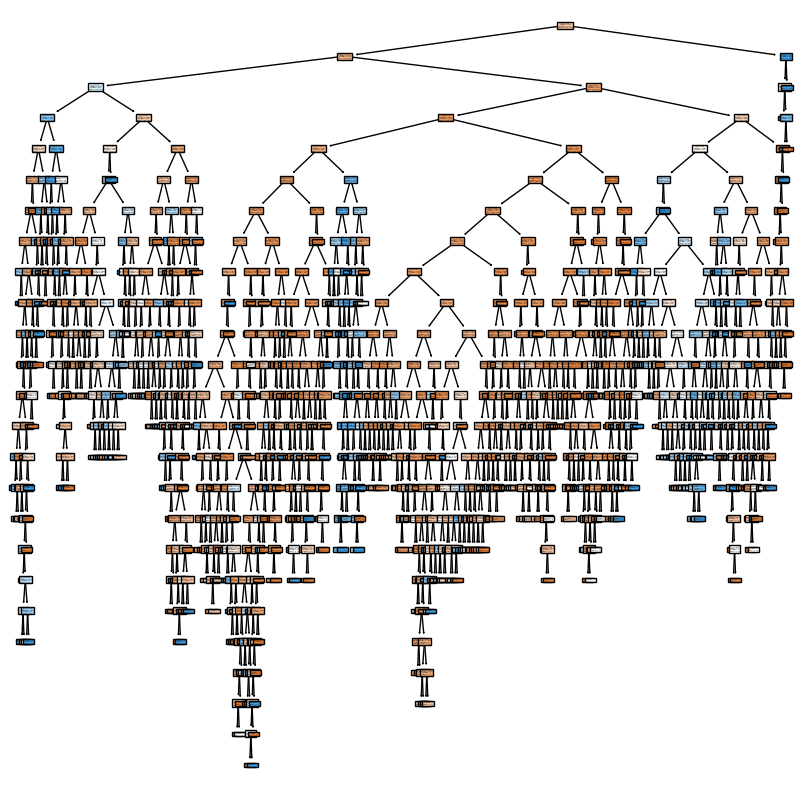

In [52]:
import matplotlib.pyplot as plt
from sklearn import datasets
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is {acc}")

Accuracy of the model is 0.8259935553168636
